Coefficients of the fitted polynomial: [ 40.68448057 -87.10821396  69.83168275 -26.33992045   3.96546878
   0.3938695 ]


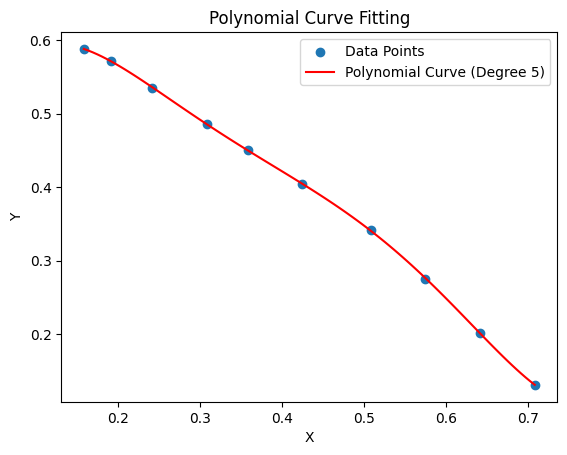

None
Predicted y-value: 0.2488235581158371


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def fit_polynomial_curve(x, y, degree):
    """
    Fit a polynomial curve to the given data points using the least squares method.

    Parameters:
    x : Input data points on x-axis.
    y : Input data points on y-axis.
    degree : Degree of the polynomial to fit i.e. Powers for x

    Returns:
    numpy.ndarray: Coefficients of the fitted polynomial.
    """
    A = np.vander(x, degree + 1)
    coeffs = np.linalg.lstsq(A, y, rcond=None)[0]
    return coeffs

def polynomial_curve(coeffs, x):
    """
    Evaluate the polynomial curve given coefficients and input x.
    """

    return np.polyval(coeffs, x)

def plot_polynomial_curve(x, y, coeffs):
    """
    Plot the original data points and the fitted polynomial curve.
    """
    plt.scatter(x, y, label='Data Points')
    x_curve = np.linspace(min(x), max(x), 100)
    y_curve = polynomial_curve(coeffs, x_curve)
    plt.plot(x_curve, y_curve, color='red', label='Polynomial Curve (Degree {})'.format(len(coeffs) - 1))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Polynomial Curve Fitting')
    plt.show()

# Cold side data
x_cold_data = np.array([0.7083, 0.6417, 0.5750, 0.5083, 0.4250, 0.3583, 0.3083, 0.2417, 0.1917, 0.1583])
y_cold_data = np.array([0.1310, 0.2017, 0.2750, 0.3417, 0.4038, 0.4503, 0.4856, 0.5352, 0.5717, 0.5876])
degree = 5  # Degree of the polynomial to fit

coefficients = fit_polynomial_curve(x_cold_data, y_cold_data, degree)
print("Coefficients of the fitted polynomial:", coefficients)
print(plot_polynomial_curve(x_cold_data, y_cold_data, coefficients))


def predict_y(coefficients, x_value):
    """
    Predict y-value for given x-value using the coefficients of the polynomial.
"""
    return polynomial_curve(coefficients, x_value)


x_value_to_predict = 0.6
predicted_y_value = predict_y(coefficients, x_value_to_predict)
print("Predicted y-value:", predicted_y_value)